# Handwritten Number Recognition with Single Digits

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras import Model
from keras import Input
from keras.layers import Dense
from keras.layers import Normalization
from keras.layers import Rescaling

from keras.optimizers import RMSprop

from keras.utils import to_categorical

from keras.datasets.mnist import load_data

import seaborn as sns

## MNIST Dataset for Handwritten Digits

In this model we are going to experiment with the famous MNIST dataset that is open source. There have been a couple of sources of inspiration for this try because many people have built models using this dataset.

In [4]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

Let's discover the dataset a bit!

We are interested in the size of the images and how these matrices look like.

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
idx = 155 # Change this number to look at other images
example = x_train[idx]

In [11]:
example

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  71, 254, 151,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  26, 245, 253, 150,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  56, 170, 253, 216,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  83, 237, 253, 252, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

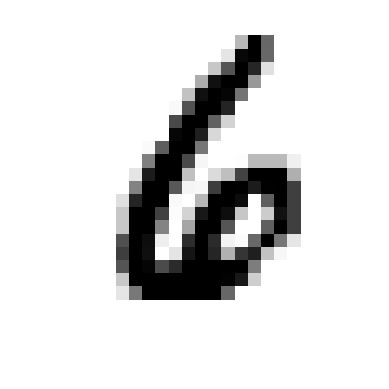

In [12]:
# Visual Representation
example = example.reshape(28, 28)

fig = plt.figure()
plt.imshow(example, cmap=plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [13]:
# Take a look at its class
y_train[idx]

6

To build a simple neural network we could reshape the matrices into arrays of dimension 1.

However, some of the information is lost this way.

In [14]:
x_train = x_train.reshape((60000, 28 * 28))

x_test = x_test.reshape((10000, 28 * 28))

# Build the Model

In [15]:
inputs = Input(shape=(28 * 28,))
x = Rescaling(scale=1./255)(inputs)
x = Dense(512, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)
mnist_model = Model(inputs, outputs)

mnist_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
mnist_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 rescaling (Rescaling)       (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Train the Model

In [17]:
mnist_model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4408 - accuracy: 0.8867
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2174 - accuracy: 0.9382
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1696 - accuracy: 0.9517
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1400 - accuracy: 0.9599
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1198 - accuracy: 0.9661
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1047 - accuracy: 0.9700
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0929 - accuracy: 0.9742
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0835 - accuracy: 0.9767
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0761 - accuracy: 0.9787
Epoch 10/10
1875/1875 [==============================] - 26s 14m

# Test the Model

In [18]:
test_loss, test_acc = mnist_model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 2s 5ms/step - loss: 0.0881 - accuracy: 0.9756


0.975600004196167

Conclusions: the model has a really great accrucay of 0.97.

Now we can experiment with giving the model a random example from the test set and checking the result.

In [32]:
# Predict labels on test data
y_pred = mnist_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

# choose a random sample from all the test data
random_num = np.random.choice(len(x_test))
X_sample = x_test[random_num]

# save true label of this sample in a variable
# y_true = np.argmax(y_test, axis=1)
y_sample_true = y_test[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]

313/313 [==============================] - 1s 4ms/step


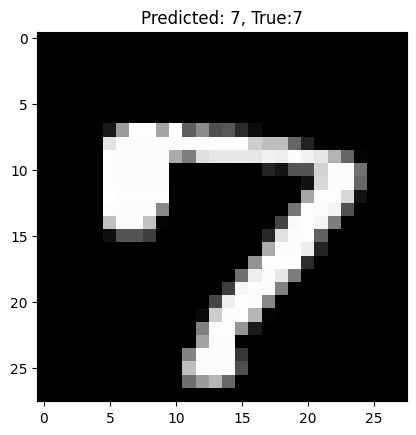

In [33]:
# visualize the original image with the predicted label and the true label
plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");

## Confusion Matrix

Another, more general visualization tool would be a confusion matrix where we can see the true labels and predicted labels of all the images from the test set.

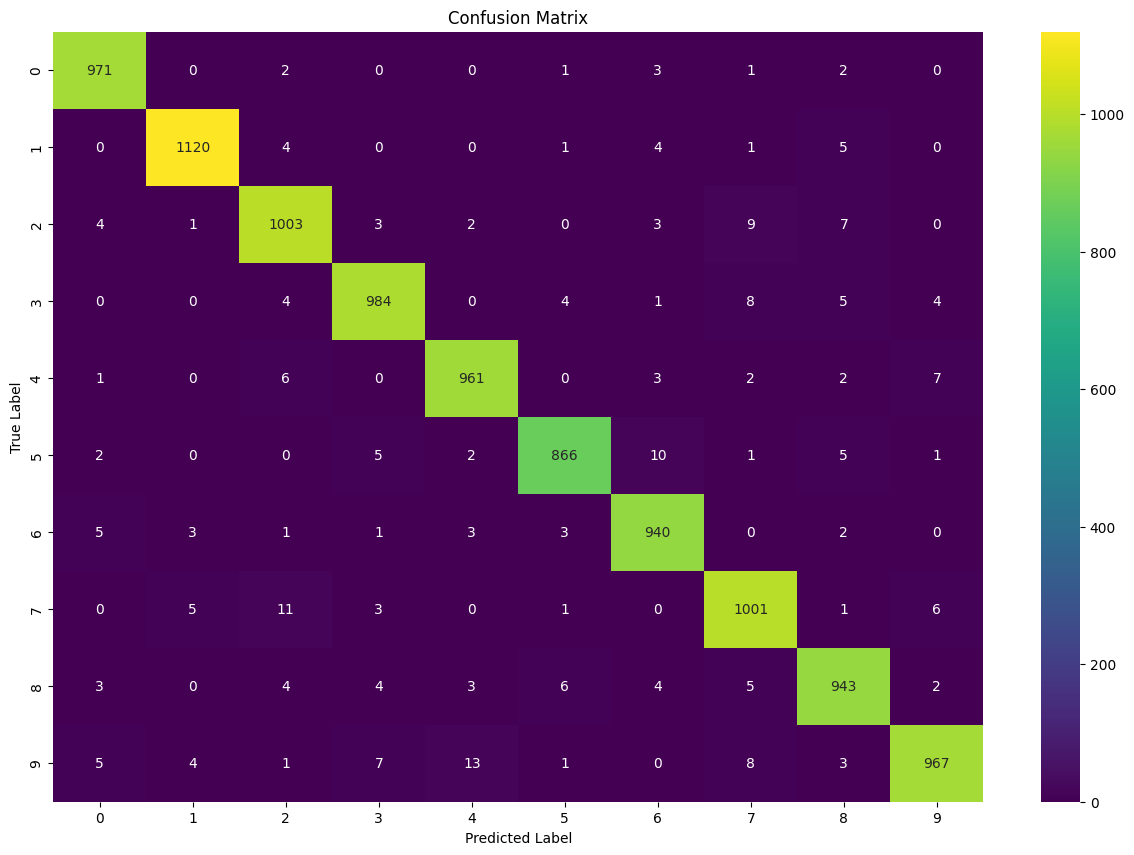

In [40]:
# generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");